<a href="https://colab.research.google.com/github/MaverickMiles/Hand-Gesture-Classifier/blob/master/Hand_Gesture_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Sign Language

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [ ]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # TODO: Create a Sequential model
        model = Sequential() 
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        # 64 convolution filters used each of size 3x3
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(128, (3, 3), activation='relu'))
        # choose the best features via pooling
        model.add(MaxPooling2D(pool_size=(2, 2)))
        # randomly turn neurons on and off to improve convergence
        model.add(Dropout(0.3))
        # flatten since too many dimensions, we only want a classification output
        model.add(Flatten())
        # fully connected to get all relevant data
        model.add(Dense(200, activation='relu'))
        # one more dropout
        model.add(Dropout(0.5))
        # output a softmax to squash the matrix into output probabilities
        model.add(Dense(25, activation='softmax'))    
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        # validation set: how many hyperparameters are we dealing with?

        train_label= to_categorical(labels)
        train_data= images.reshape((len(images),28,28,1))
        # label in the first column
        
        # Normalize
        train_mean = np.mean(train_data, axis=0)
        train_std = np.std(train_data, axis=0)
        train_data = (train_data - train_mean) / train_std

        train_data, test_data, train_label, test_label = train_test_split(
            train_data,train_label,test_size=0.15,random_state=43)
        
        self.data = {
            "train": (train_data,train_label), # (x_train, y_train)
            "test" : (test_data, test_label) # (x_test, y_test)
        }
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        
        history = self.model.fit(x=self.data['train'][0],
                                 y=self.data['train'][1],
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 verbose=verbose,
                                 validation_data=self.data['test'])
        
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        data= data.reshape((len(data),28,28,1))
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        data = (data - mean) / std
        predictions = self.model.predict(data)
        decode_predictions = np.argmax(predictions,axis=1)
        return decode_predictions
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

In [ ]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [ ]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

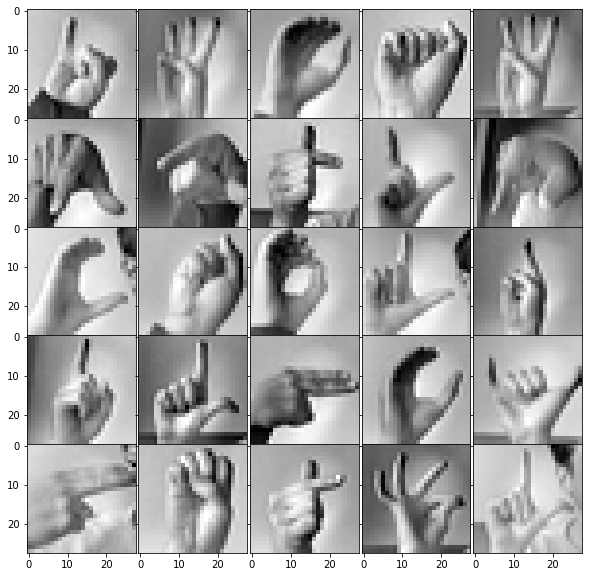

In [ ]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Train on 23336 samples, validate on 4119 samples
Epoch 1/30
23336/23336 [==============================] - 3s 140us/step - loss: 1.0156 - accuracy: 0.6913 - val_loss: 0.0798 - val_accuracy: 0.9883
Epoch 2/30
23336/23336 [==============================] - 3s 125us/step - loss: 0.1275 - accuracy: 0.9622 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 3/30
23336/23336 [==============================] - 3s 126us/step - loss: 0.0519 - accuracy: 0.9853 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/30
23336/23336 [==============================] - 3s 126us/step - loss: 0.0319 - accuracy: 0.9910 - val_loss: 7.1925e-04 - val_accuracy: 1.0000
Epoch 5/30
23336/23336 [==============================] - 3s 126us/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 4.0710e-04 - val_accuracy: 1.0000
Epoch 6/30
23336/23336 [==============================] - 3s 129us/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 4.1641e-04 - val_accuracy: 1.0000
Epoch 7/30
23336/23336 [===========================

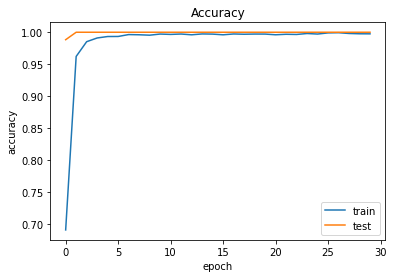

In [ ]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [ ]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

0.9647239263803681
